In [6]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)


TensorFlow version: 1.1.0


In [7]:
import keras

In [15]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()




In [16]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('CNN_Data/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('CNN_Data/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history = classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 2000)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/10
8000/8000 [==============================] - 5845s 731ms/step - loss: 0.3468 - acc: 0.8385 - val_loss: 0.6133 - val_acc: 0.8022
Epoch 2/10
8000/8000 [==============================] - 5804s 726ms/step - loss: 0.0974 - acc: 0.9635 - val_loss: 0.9308 - val_acc: 0.8162
Epoch 3/10
8000/8000 [==============================] - 6371s 796ms/step - loss: 0.0498 - acc: 0.9822 - val_loss: 1.2520 - val_acc: 0.7845
Epoch 4/10
8000/8000 [==============================] - 5977s 747ms/step - loss: 0.0363 - acc: 0.9876 - val_loss: 1.1598 - val_acc: 0.8104
Epoch 5/10
8000/8000 [==============================] - 5438s 680ms/step - loss: 0.0290 - acc: 0.9902 - val_loss: 1.2092 - val_acc: 0.8161
Epoch 6/10
8000/8000 [==============================] - 5886s 736ms/step - loss: 0.0252 - acc: 0.9918 - val_loss: 1.4047 - val_acc: 0.7978
Epoch 7/10
8000/8000 [==============================] - 5868s 733ms/step - loss: 0

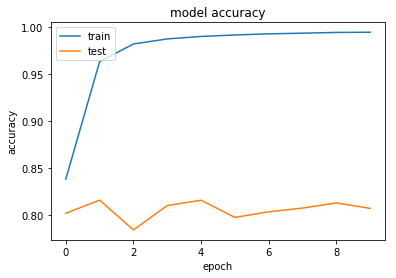

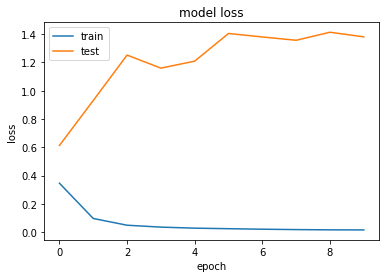

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# summarize history for accuracy
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

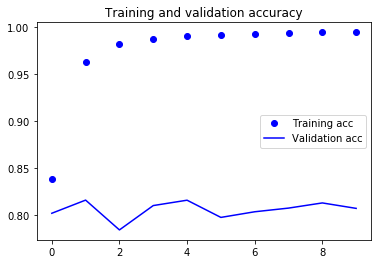

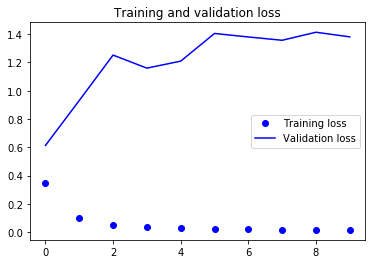

In [22]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('CNN_Data/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

cat
